檔案網址
https://www.superdatascience.com/machine-learning/

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #pyplot是次libraries
from os import listdir
from os.path import isfile,isdir,join
from os import walk


In [3]:
mypath = "Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Polynomial_Regression"
files = listdir(mypath)

# 遞迴列出所有子目錄與檔案
for root, dirs, files in walk(mypath):#找出資料夾內容
  print("路徑：", root)
  print("  目錄：", dirs)
  print("  檔案：", files)

for root, dirs, files in walk(mypath): #讀取絕對路徑
  for f in files:
    fullpath = join(root, f)
    print(fullpath)

路徑： Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Polynomial_Regression
  目錄： []
  檔案： ['.DS_Store', 'data_preprocessing_template.py', 'data_preprocessing_template.R', 'polynomial_regression.py', 'polynomial_regression.R', 'Position_Salaries.csv']
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Polynomial_Regression/.DS_Store
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Polynomial_Regression/data_preprocessing_template.py
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Polynomial_Regression/data_preprocessing_template.R
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Polynomial_Regression/polynomial_regression.py
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Polynomial_Regression/polynomial_regression.R
Machine Learning A-Z T

In [4]:
datapath= mypath + '/'+ 'Position_Salaries.csv' #可列出資料位置
testdata = pd.read_csv(datapath)

In [5]:
testdata 
#可看出是非線性
#只要後兩行來做訓練

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
x = testdata.iloc[:, 1:2].values 
#左邊的 : 是整行line（0-9）
#右邊的:-1是列columns,此數據x的:-1跟 
#0雖然一樣，但在最後fit時會影響到，因為訓練時要使用x要用matrix,y要用vector
y = testdata.iloc[:, 2].values

In [32]:
X_poly

array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.]])

多項式非線性迴歸不用做test跟train的分類

此章節會做線性及非線性的比較

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
pre_y = lin_reg.predict(x)

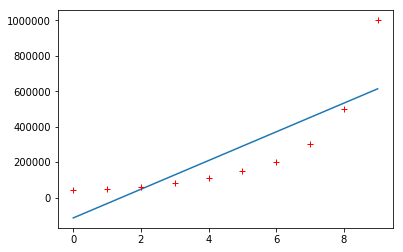

In [10]:
plt.plot(pre_y)
plt.plot(y,'r+')

polynomail

fitting polynomail regresstion to the dataset

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_reg = PolynomialFeatures(degree=4)
#如果degree變成3會更接近

In [47]:
X_poly = poly_reg.fit_transform(x)

In [48]:
X_poly

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02],
       [  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29600000e+03],
       [  1.00000000e+00,   7.00000000e+00,   4.90000000e+01,
          3.43000000e+02,   2.40100000e+03],
       [  1.00000000e+00,   8.00000000e+00,   6.40000000e+01,
          5.12000000e+02,   4.09600000e+03],
       [  1.00000000e+00,   9.00000000e+00,   8.10000000e+01,
          7.29000000e+02,   6.56100000e+03],
       [  1.00000000e+00,   1.0000000

In [49]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
pre_ploy_y = lin_reg_2.predict(X_poly)

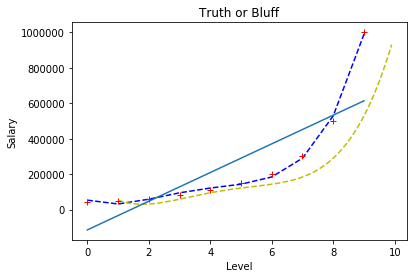

In [64]:
x_grid = np.arange(min(x),max(x),0.1) #把x切細
x_grid = x_grid.reshape((len(x_grid),1)) #轉成matrix
plt.plot(pre_ploy_y,'b--')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)),'y--')
plt.plot(pre_y)
plt.plot(y,'r+')
plt.title('Truth or Bluff')
plt.xlabel(testdata.columns[1])
plt.ylabel(testdata.columns[2])
plt.show()
#原本出現'str' object is not callable
#可能是變數被覆蓋，重整後就可以用了
#degree3比degree2精準，degree4>3>2

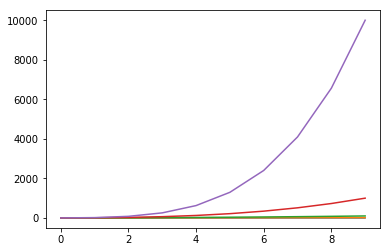

In [69]:
plt.plot(X_poly)

predicting a new result with Linear regresstion

In [71]:
lin_reg.predict(6.5) #可隨意放入數字

array([ 330378.78787879])

In [82]:
lin_reg_2.predict(poly_reg.fit_transform(1))

array([ 53356.64335679])

In [81]:
poly_reg.fit_transform(1)


array([[ 1.,  1.,  1.,  1.,  1.]])